### Importing the library 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Importing Data
The data consists of 9 columns:
<pre>
Sales Person - Name of the sales person
Geography - Country where the chocolates are sold
Product - Name of the product 
Amount - Price at which the chocolates were sold
Units - Number of units of chocolates sold
cost per unit - Price of one unit of chocolate
Cost - Price at which chocolates were bought ny the sales person
Profit - Profit made
profit % - Percentage of profit made.
<pre>

In [2]:
df = pd.read_csv("D:\Imam\Belajar\Python\Data_Science\Chocolate\choclate protfolio project - 11.csv", sep = ",")
df

,Sales Person,Geography,Product,Amount,Units,cost per unit,Cost,Profit,profit %
0,Ram Mahesh,New Zealand,70% Dark Bites,"$1,624",114,14,"1,652",($28),-2%
1,Brien Boise,USA,Choco Coated Almonds,"$6,706",459,9,"3,970","$2,736",41%
2,Husein Augar,USA,Almond Choco,$959,147,12,"1,746",($787),-82%
3,Carla Molina,Canada,Drinking Coco,"$9,632",288,6,"1,863","$7,769",81%
4,Curtice Advani,UK,White Choc,"$2,100",414,13,"5,444","($3,344)",-159%
...,...,...,...,...,...,...,...,...,...
295,Gunar Cockshoot,New Zealand,Almond Choco,$938,366,12,"4,348","($3,410)",-364%
296,Gunar Cockshoot,Australia,Baker's Choco Chips,"$8,841",303,6,"1,697","$7,144",81%
297,Barr Faughny,UK,Peanut Butter Cubes,"$4,018",126,12,"1,559","$2,459",61%
298,Carla Molina,New Zealand,Raspberry Choco,$714,231,12,"2,710","($1,996)",-280%


### Data Preparation and Data Cleaning

We transform the data like in the column profit, we see the data have symbol $ and () to use negatif value <br>
So, we transform it and change the type of data.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   300 non-null    object
 1   Geography      300 non-null    object
 2   Product        300 non-null    object
 3   Amount         300 non-null    object
 4   Units          300 non-null    int64 
 5   cost per unit  300 non-null    int64 
 6   Cost           300 non-null    object
 7   Profit         300 non-null    object
 8   profit %       300 non-null    object
dtypes: int64(2), object(7)
memory usage: 21.2+ KB


the type of data Amount, Cost, Profit and profit % is object, so we will transform the data to data int and float

In [4]:
df['Profit'] = df["Profit"].str.replace("(", "-", regex=True) #change string '(' to ''
df['Profit'] = df["Profit"].str.replace(")", "", regex=True) #change string ')' to ''
df['Profit'] = df["Profit"].str.replace('$', '', regex = True) #change string '$' to ''
df['Profit'] = df["Profit"].str.replace(',', '', regex = True) #change string ',' to ''
df['Profit'] = df["Profit"].astype('int32') #change type of column profit from str to int32

df['Cost'] = df["Cost"].str.replace(",", "", regex=True) #change string ',' to ''

df['Amount'] = df["Amount"].str.replace("$", "", regex=True) #change string '$' to ''
df['Amount'] = df["Amount"].str.replace(",", "", regex=True) #change string ',' to ''
df['Amount'] = df["Amount"].astype('int32') #change type of column profit from str to int32

#in column profit % we have value #DIV/0! so we remove it
df = df[df["profit %"] != '#DIV/0!']

df['profit %'] = df["profit %"].str.replace('%','', regex = True) #change string '$' to ''
df['profit %'] = df["profit %"].astype('int32') #change type of column profit from str to int32
df['profit %'] = df["profit %"]/100 #change the int of persen value to decimal value

In [5]:
df

,Sales Person,Geography,Product,Amount,Units,cost per unit,Cost,Profit,profit %
0,Ram Mahesh,New Zealand,70% Dark Bites,1624,114,14,1652,-28,-0.02
1,Brien Boise,USA,Choco Coated Almonds,6706,459,9,3970,2736,0.41
2,Husein Augar,USA,Almond Choco,959,147,12,1746,-787,-0.82
3,Carla Molina,Canada,Drinking Coco,9632,288,6,1863,7769,0.81
4,Curtice Advani,UK,White Choc,2100,414,13,5444,-3344,-1.59
...,...,...,...,...,...,...,...,...,...
295,Gunar Cockshoot,New Zealand,Almond Choco,938,366,12,4348,-3410,-3.64
296,Gunar Cockshoot,Australia,Baker's Choco Chips,8841,303,6,1697,7144,0.81
297,Barr Faughny,UK,Peanut Butter Cubes,4018,126,12,1559,2459,0.61
298,Carla Molina,New Zealand,Raspberry Choco,714,231,12,2710,-1996,-2.80


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 299
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sales Person   299 non-null    object 
 1   Geography      299 non-null    object 
 2   Product        299 non-null    object 
 3   Amount         299 non-null    int32  
 4   Units          299 non-null    int64  
 5   cost per unit  299 non-null    int64  
 6   Cost           299 non-null    object 
 7   Profit         299 non-null    int32  
 8   profit %       299 non-null    float64
dtypes: float64(1), int32(2), int64(2), object(4)
memory usage: 21.0+ KB


In [7]:
#check the Nan value
df.isna().sum()

Sales Person     0
Geography        0
Product          0
Amount           0
Units            0
cost per unit    0
Cost             0
Profit           0
profit %         0
dtype: int64

In [8]:
#check the Null value
df.isnull().sum()

Sales Person     0
Geography        0
Product          0
Amount           0
Units            0
cost per unit    0
Cost             0
Profit           0
profit %         0
dtype: int64

The data is clean so we can use it to analysis

In [9]:
df_Person = df.groupby('Sales Person').sum().sort_values('profit %') #Make a df_Person by grouping the sales person by profit %

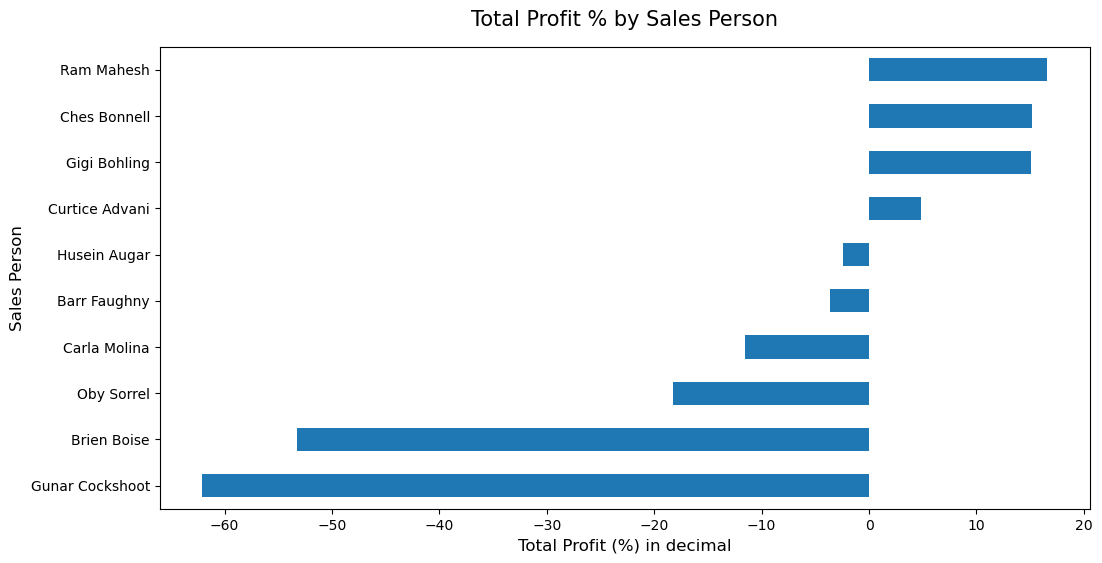

In [10]:
df_Person['profit %'].plot(kind = 'barh', figsize = (12,6))
plt.title('Total Profit % by Sales Person', size = 15, pad = 15)
plt.xlabel('Total Profit (%) in decimal', size = 12)
plt.ylabel('Sales Person', size = 12)
plt.show()

In [11]:
df_Product = df.groupby('Product').sum().sort_values('profit %', ascending = True) #Make a df_Product by grouping the Product by profit %

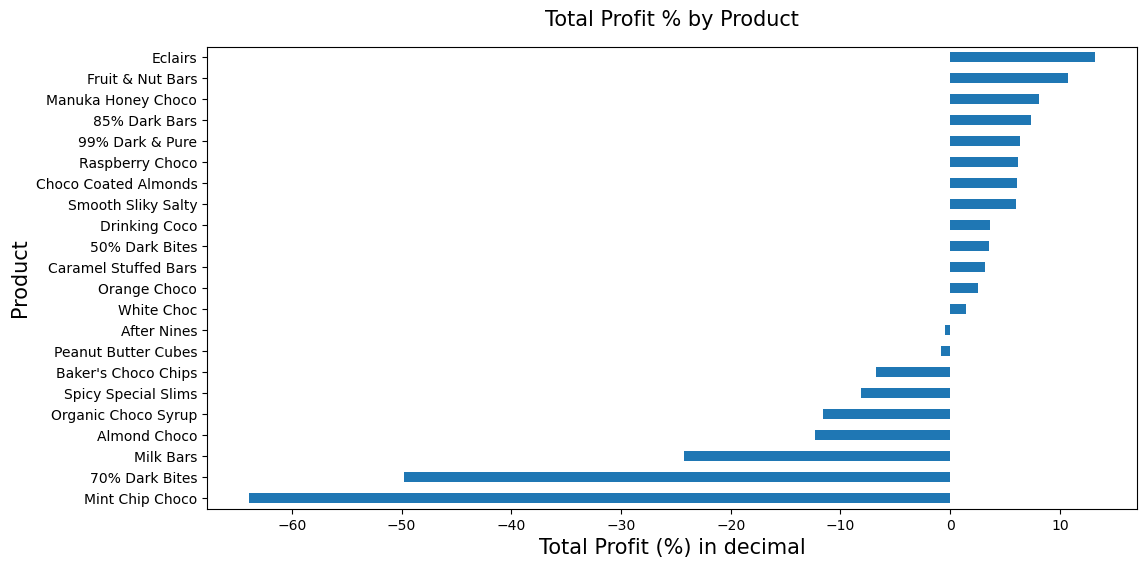

In [12]:
df_Product['profit %'].plot(kind = 'barh', figsize=(12,6))
plt.title('Total Profit % by Product', size = 15, pad = 15)
plt.xlabel('Total Profit (%) in decimal', size = 15)
plt.ylabel('Product', size = 15)
plt.show()

In [13]:
df_Person_Unit = df.groupby('Sales Person').sum().sort_values('Units', ascending = False).head(6) #Make a df_Person_Unit by grouping the sales person by Units

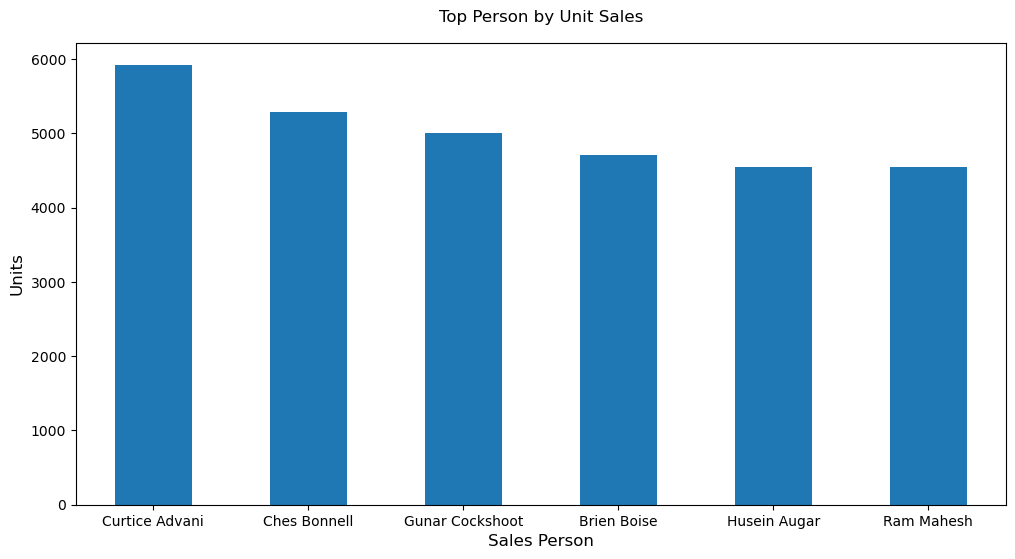

In [14]:
df_Person_Unit['Units'].plot(kind = 'bar', figsize=(12,6))
plt.title('Top Person by Unit Sales', size = 12, pad = 15)
plt.xticks(rotation = 0)
plt.ylabel('Units', size = 12)
plt.xlabel('Sales Person', size = 12)
plt.show()

In [15]:
df_Person_Product = df.groupby('Sales Person').sum().sort_values('Profit', ascending = False).head(6) #Make a df_Person_Product by grouping the sales person by Profit

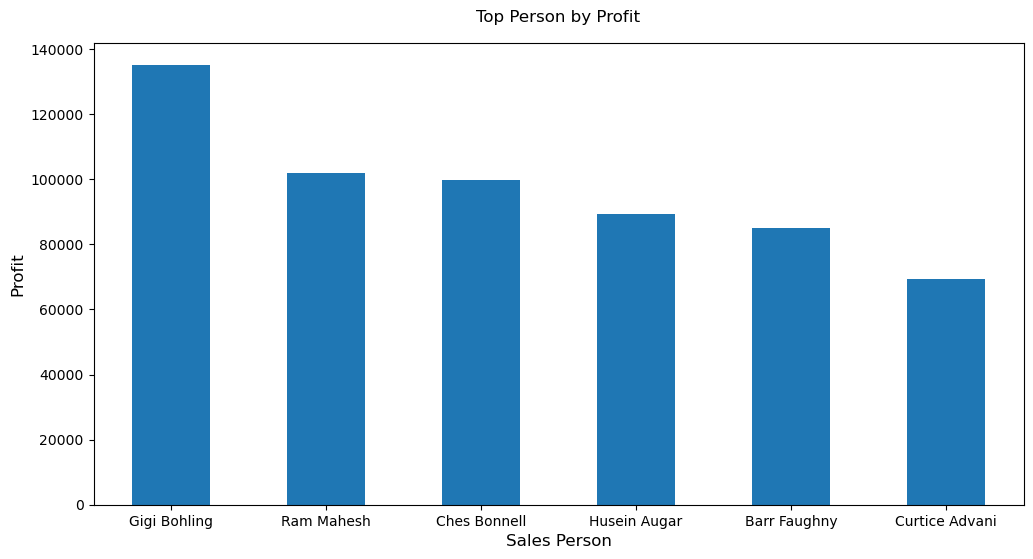

In [16]:
df_Person_Product['Profit'].plot(kind = 'bar', figsize=(12,6))
plt.title('Top Person by Profit', size = 12, pad = 15)
plt.xticks(rotation = 0)
plt.ylabel('Profit', size = 12)
plt.xlabel('Sales Person', size = 12)
plt.show()

In [17]:
df_Product_Units = df.groupby('Product').sum().sort_values('Units', ascending = False).head(6) #Make a df_Product_Units by grouping the Product by Units

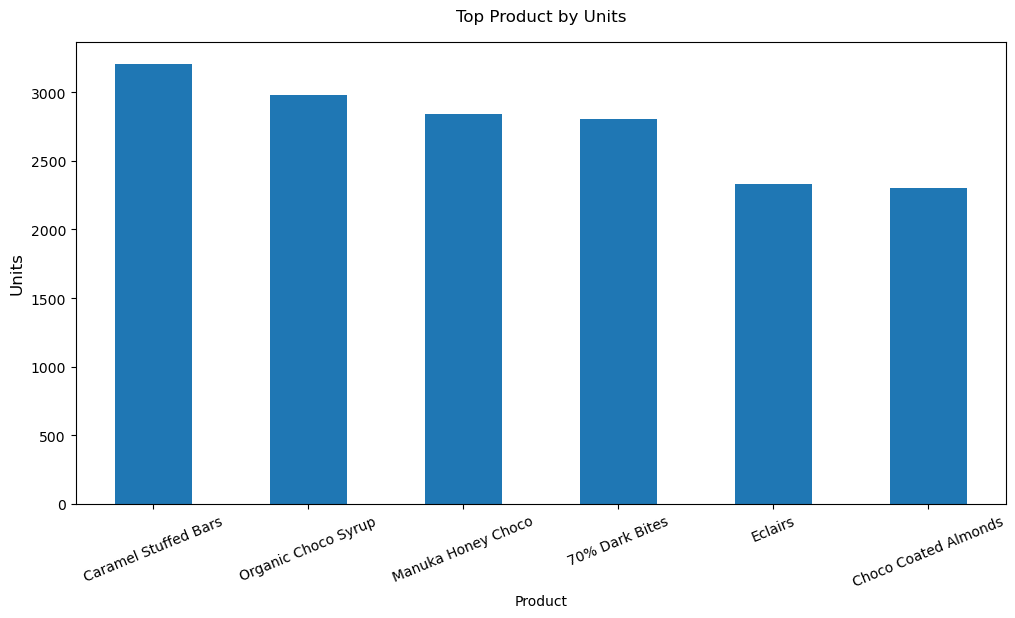

In [18]:
df_Product_Units['Units'].plot(kind = 'bar', figsize = (12,6))
plt.title('Top Product by Units', size = 12, pad = 15)
plt.xticks(rotation=22.5)
plt.ylabel('Units', size = 12)
plt.show()

In [19]:
df_Product_Profit = df.groupby('Product').sum().sort_values('Profit', ascending = False).head(6) #Make a df_Product_Profit by grouping the Product by Profit

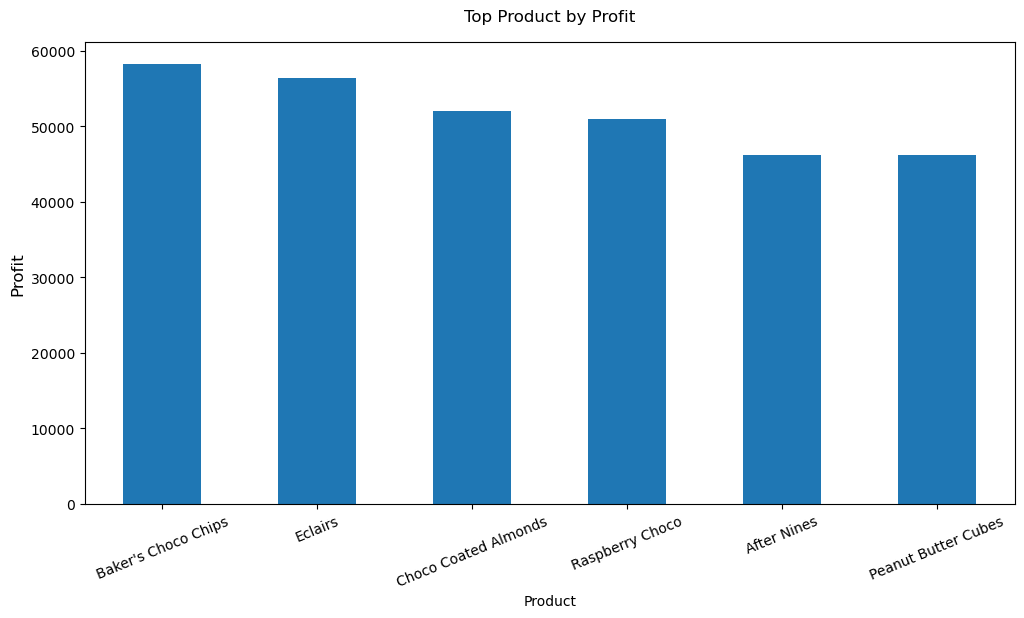

In [20]:
df_Product_Profit['Profit'].plot(kind = 'bar', figsize = (12,6))
plt.title('Top Product by Profit', size = 12, pad = 15)
plt.xticks(rotation=22.5)
plt.ylabel('Profit', size = 12)
plt.show()

In [21]:
df_Geography = df.groupby('Geography').sum().sort_values('Units', ascending = False) #Make a df_Geography by grouping the Geography by Units

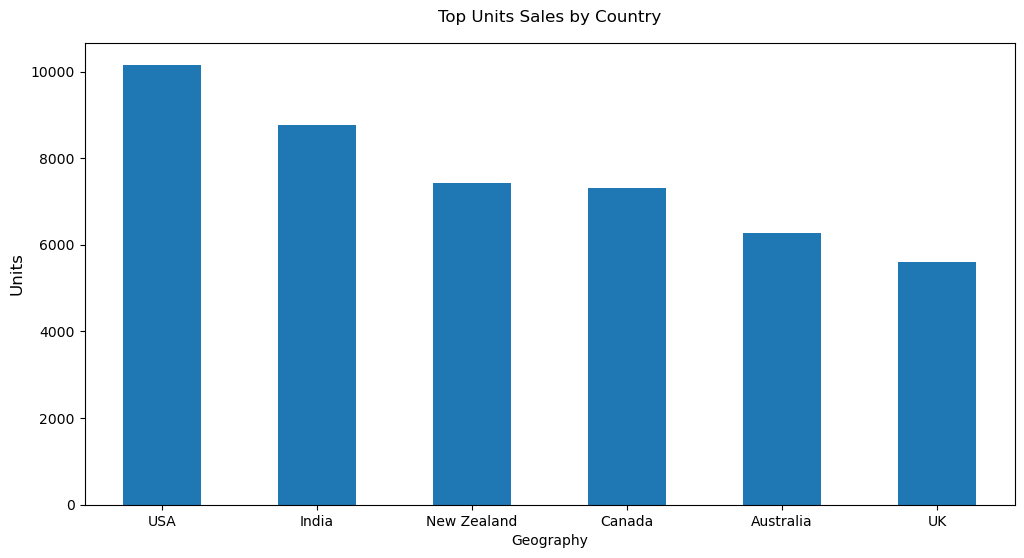

In [22]:
df_Geography['Units'].plot(kind = 'bar', figsize = (12,6))
plt.ylabel('Units', size = 12)
plt.xticks(rotation = 0)
plt.title('Top Units Sales by Country', size = 12, pad = 15)
plt.show()

In [23]:
df_Geography_Amount = df.groupby('Geography').sum().sort_values('Amount', ascending = False) #Make a df_Geography_Amount by grouping the Geography by Amount

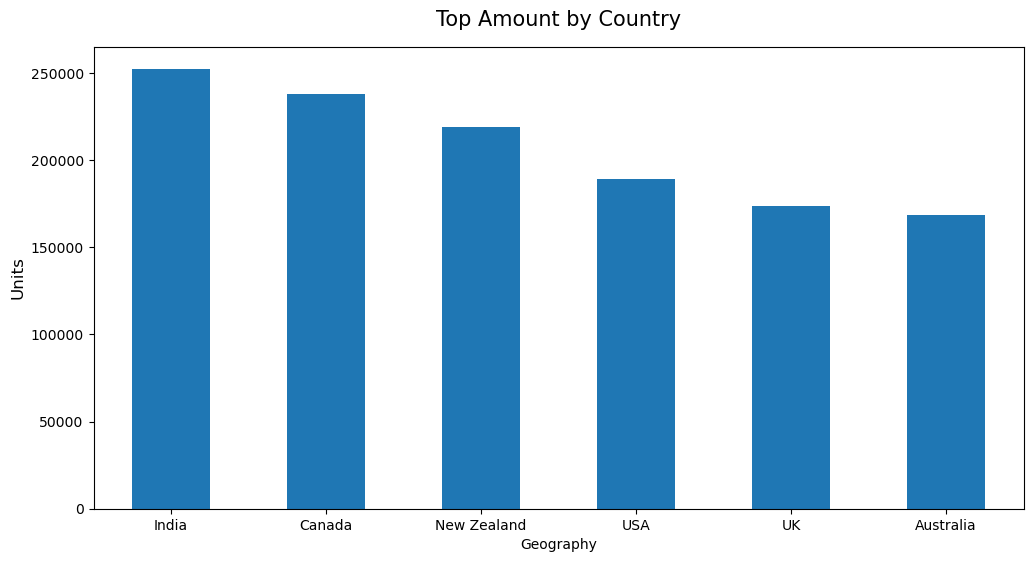

In [24]:
df_Geography_Amount['Amount'].plot(kind = 'bar', figsize = (12,6))
plt.ylabel('Units', size = 12)
plt.xticks(rotation = 0)
plt.title('Top Amount by Country', size = 15, pad = 15)
plt.show()

## Summary and conclusions

<pre>
Ram Mahesh is the top in Total Profit % by Sales Person

Eclairs is the top product in Total Profit % by Product

Curtice Advani is the Top Person by Unit Sales

Gigi Bohling is the Top Person by Profit

Caramel Stuffed Bars Top Product by Units

Baker's Choco Chips is the Top Product by Profit

USA is the Top Units Sales by Country

India is the Top Amount by Country
<pre>